<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

## Load and Prepare Data

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## EDA

In [3]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

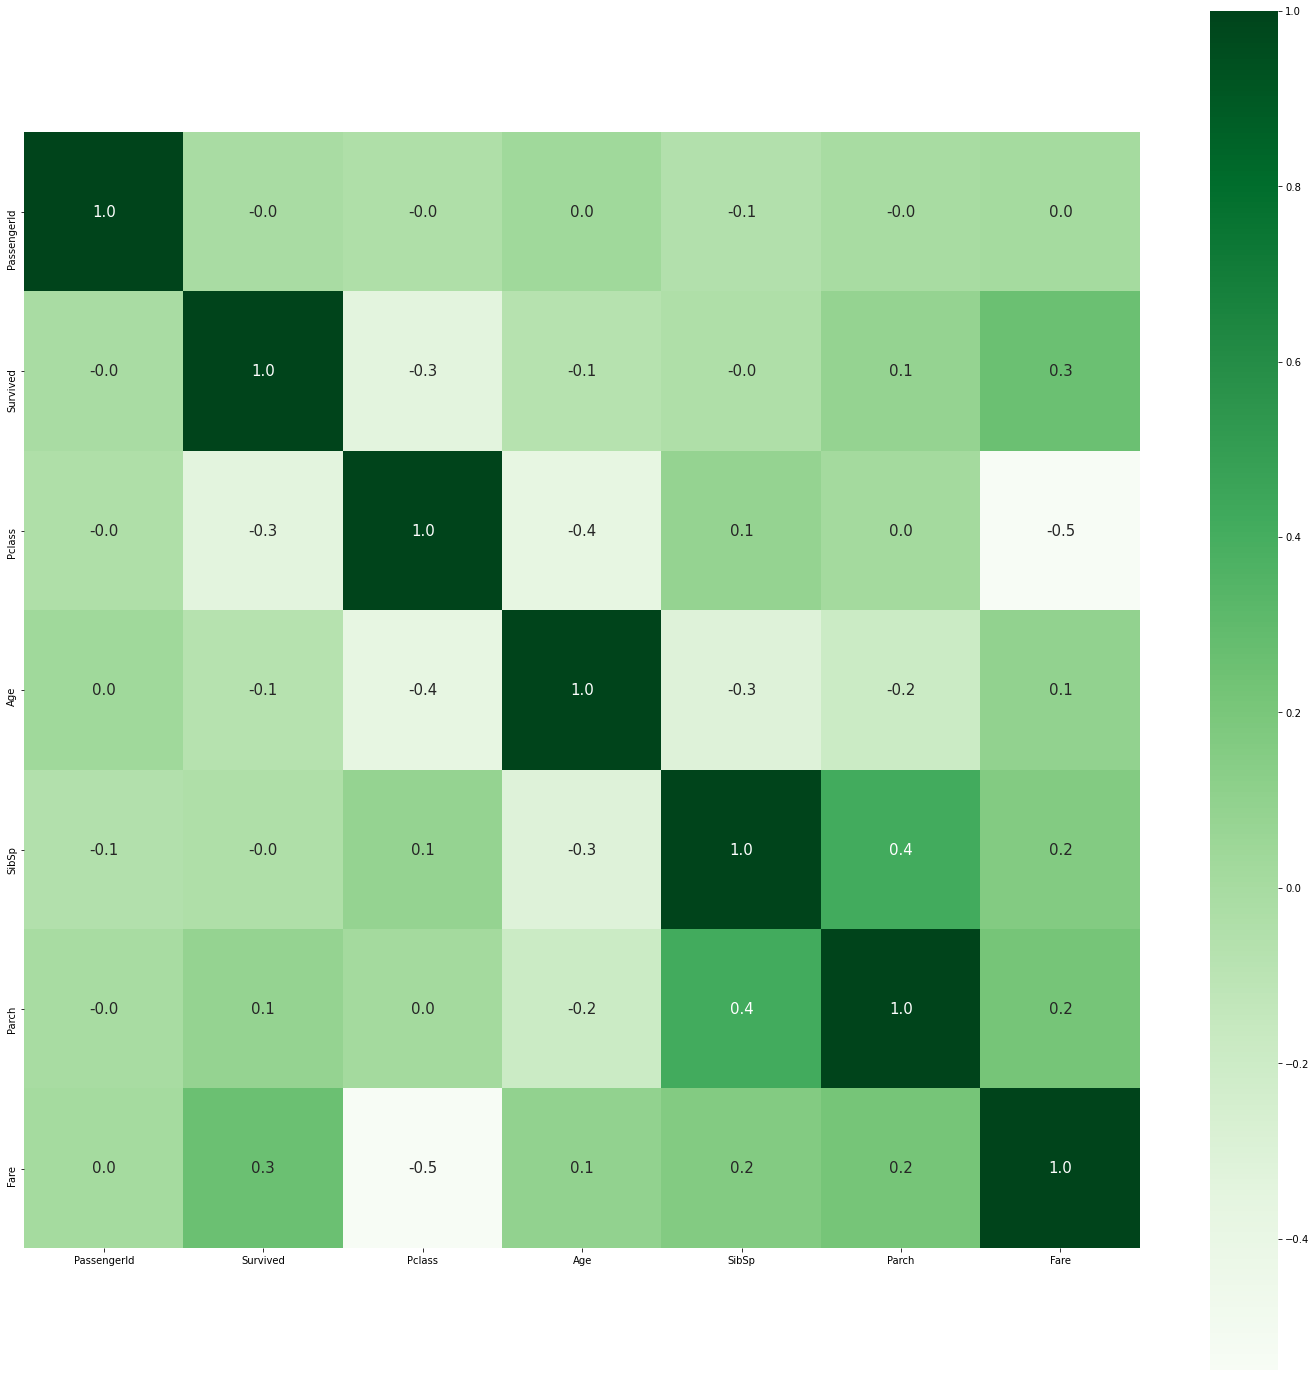

In [6]:
titanic_corr = titanic.corr()
plt.figure(figsize=(25,25))
sns.heatmap(titanic_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [7]:
pd.crosstab(titanic.Sex,titanic.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


## Data Preprocessing

In [8]:
labelsex = LabelEncoder()
titanic['Sex'] = labelsex.fit_transform(titanic['Sex'])
labelembarked = LabelEncoder()
titanic['Embarked'] = labelembarked.fit_transform(titanic['Embarked'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [9]:
X = titanic.drop(['Name','Ticket','PassengerId','Cabin','Survived'],axis=1)
Y = titanic['Survived']

In [10]:
null = ['Age','Embarked']
X[null] = X[null].replace({np.nan:X['Age'].mean(),np.nan:X['Embarked'].mode()})
X.fillna(X.mean(), inplace=True)

In [11]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [12]:
sc = StandardScaler()
X_scale = sc.fit_transform(X)

## Visualization

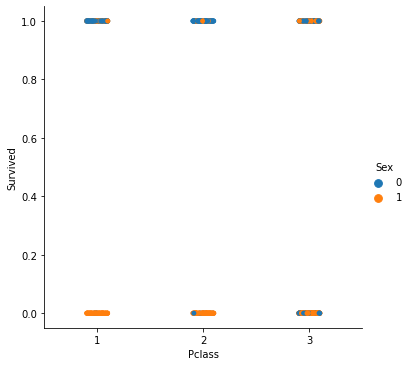

In [13]:
sns.catplot(x='Pclass',y='Survived',data=titanic,hue='Sex')

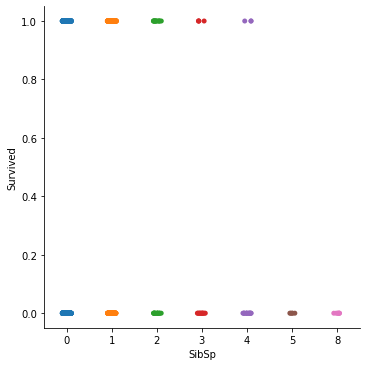

In [14]:
sns.catplot(x='SibSp',y='Survived',data=titanic)

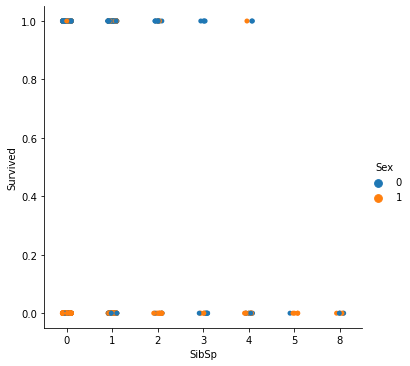

In [15]:
sns.catplot(x='SibSp',y='Survived',data=titanic,hue='Sex')

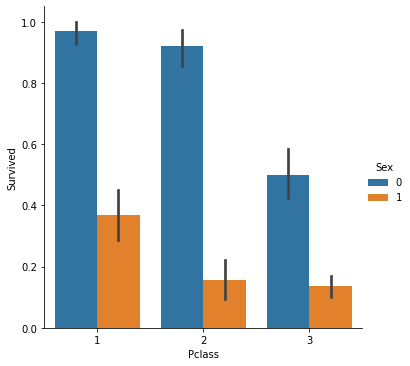

In [16]:
sns.catplot(x='Pclass',y='Survived',data=titanic,hue='Sex',kind='bar')

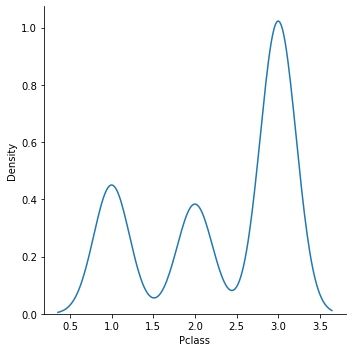

In [17]:
sns.displot(titanic,x='Pclass',kind='kde')

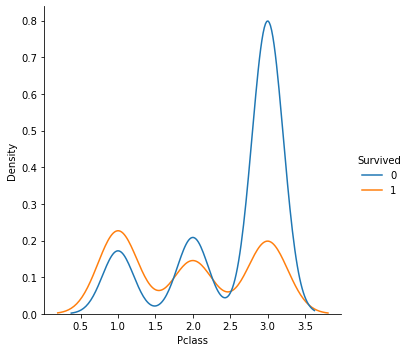

In [18]:
sns.displot(titanic,x='Pclass',kind='kde',hue='Survived')

## Train your model (Classification)

### Logistic Regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=5)

In [20]:
logreg = LogisticRegression()
MSE = cross_val_score(logreg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)

-0.2107849896582291


In [21]:
logreg.fit(X_train,y_train)
y_test_predict = logreg.predict(X_test)

In [22]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_test_predict)))

The accuracy of Logistic Regression is:  0.8212290502793296


In [23]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



### KNN Method

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_test_knn = knn.predict(X_test)
print(classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       111
           1       0.82      0.79      0.81        68

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



### Optimal value of k

In [26]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

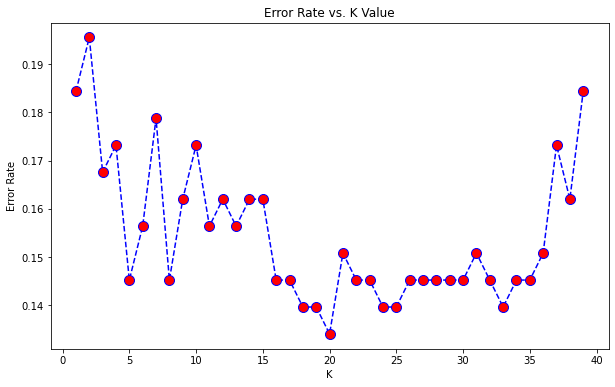

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
knn = KNeighborsClassifier(n_neighbors=20)
MSE = cross_val_score(knn, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
knn.fit(X_train, y_train)

-0.2023539840441249


KNeighborsClassifier(n_neighbors=20)

In [29]:
y_test_knn = knn.predict(X_test)
print(classification_report(y_test, y_test_knn))
accuracy = metrics.accuracy_score(y_test, y_test_knn) * 100
print("Accuracy of the KNN Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       111
           1       0.88      0.75      0.81        68

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

Accuracy of the KNN Model:  86.59217877094973


<AxesSubplot:>

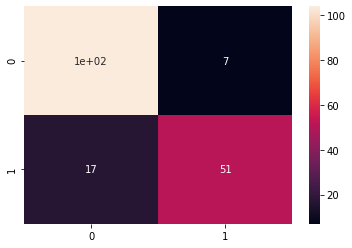

In [31]:
cm_knn = confusion_matrix(y_test,y_test_knn)
sns.heatmap(cm_knn,annot=True)

### Naiive Bayes

In [32]:
classifier = GaussianNB()
MSE = cross_val_score(classifier, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
classifier.fit(X_train, y_train)

-0.22203289668078402


GaussianNB()

In [33]:
y_test_NB=classifier.predict(X_test)
print(classification_report(y_test, y_test_NB))
accuracy = metrics.accuracy_score(y_test, y_test_NB) * 100
print("Accuracy of the Naive beyes Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Accuracy of the Naive beyes Model:  81.56424581005587


### ANN Method

In [34]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [35]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [36]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [37]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [38]:
ann.fit(X_train, y_train, batch_size = 40, epochs = 700)

Epoch 1/700
18/18 [==============================] - 1s 1ms/step - loss: 0.6000 - accuracy: 0.7191
Epoch 2/700
18/18 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7865
Epoch 3/700
18/18 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.7963
Epoch 4/700
18/18 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8006
Epoch 5/700
18/18 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8146
Epoch 6/700
18/18 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8244
Epoch 7/700
18/18 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8244
Epoch 8/700
18/18 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8287
Epoch 9/700
18/18 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8315
Epoch 10/700
18/18 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8301
Epoch 11/

18/18 [==============================] - 0s 2ms/step - loss: 0.2735 - accuracy: 0.8834
Epoch 164/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.8904
Epoch 165/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8834
Epoch 166/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8876
Epoch 167/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.8919
Epoch 168/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8876
Epoch 169/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.8890
Epoch 170/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8862
Epoch 171/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.8820
Epoch 172/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2718 - accuracy: 0.8890
Epoc

18/18 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.8975
Epoch 326/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.8933
Epoch 327/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8919
Epoch 328/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.8947
Epoch 329/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.9045
Epoch 330/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9017
Epoch 331/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.8989
Epoch 332/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.8989
Epoch 333/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.8989
Epoch 334/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8989
Epoc

18/18 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9059
Epoch 488/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9087
Epoch 489/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2208 - accuracy: 0.9101
Epoch 490/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.8947
Epoch 491/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2168 - accuracy: 0.9073
Epoch 492/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9017
Epoch 493/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9003
Epoch 494/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9129
Epoch 495/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9087
Epoch 496/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9017
Epoc

18/18 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9101
Epoch 650/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9087
Epoch 651/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9073
Epoch 652/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9143
Epoch 653/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.9045
Epoch 654/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.9017
Epoch 655/700
18/18 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9087
Epoch 656/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9129
Epoch 657/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2074 - accuracy: 0.9087
Epoch 658/700
18/18 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9003
Epoc

In [39]:
y_test_ANN = ann.predict(X_test)

In [40]:
for i in range(len(y_test_ANN)):
    if y_test_ANN[i]>=0.5:
        y_test_ANN[i] = 1
    else:
        y_test_ANN[i] = 0

In [41]:
print(classification_report(y_test, y_test_ANN))
accuracy = metrics.accuracy_score(y_test, y_test_ANN) * 100
print("Accuracy of the ANN Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       111
           1       0.74      0.75      0.74        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Accuracy of the ANN Model:  80.44692737430168


### SVM

In [42]:

svclassifier = SVC(kernel='rbf')
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [43]:
best_parameters = grid_search.best_params_
print("Best Parameters:", best_parameters)
best_accuracy = grid_search.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy: 81.46 %


In [44]:
y_test_SVM = grid_search.predict(X_test)
print(classification_report(y_test, y_test_SVM))
accuracy = metrics.accuracy_score(y_test, y_test_SVM) * 100
print("Accuracy of the SVM Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.72      0.78        68

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Accuracy of the SVM Model:  84.35754189944134


### Decision Tree

In [45]:
classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
MSE = cross_val_score(classifierdt, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
classifierdt.fit(X_train, y_train)

-0.21769920220624445


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_test_DT = classifierdt.predict(X_test)
print(classification_report(y_test, y_test_DT))
accuracy = metrics.accuracy_score(y_test, y_test_DT) * 100
print("Accuracy of the decision tree Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       111
           1       0.77      0.72      0.74        68

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy of the decision tree Model:  81.00558659217877


### Random Forest

In [47]:
rfc = RandomForestClassifier(criterion = 'gini', random_state = 42,n_estimators=1000)
MSE = cross_val_score(rfc, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mean_MSE = np.mean(MSE)
print(mean_MSE)
rfc.fit(X_train, y_train)

-0.2009258347286516


RandomForestClassifier(n_estimators=1000, random_state=42)

In [48]:
y_test_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_test_rfc))
accuracy = metrics.accuracy_score(y_test, y_test_rfc) * 100
print("Accuracy of the random forest Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

Accuracy of the random forest Model:  82.68156424581005


### XGBoost

In [49]:
estimator = XGBClassifier(use_label_encoder=False,booster='dart',objective='binary:logistic')
parameters = {"learning_rate"    : [0.0005] ,         
     "max_depth"        : [4],
     "min_child_weight" : [ 5],
     "colsample_bytree" : [0.55],
     "n_estimators"     : [700]}
grid_search_xgb = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    cv = 10,
    verbose=True
)

grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[12:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:46

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0005, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [50]:
y_test_xg = grid_search_xgb.predict(X_test)
print(classification_report(y_test, y_test_xg))
accuracy = metrics.accuracy_score(y_test, y_test_xg) * 100
print("Accuracy of the XGBOOST Model: ",accuracy)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       111
           1       0.91      0.72      0.80        68

    accuracy                           0.87       179
   macro avg       0.88      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

Accuracy of the XGBOOST Model:  86.59217877094973


<AxesSubplot:>

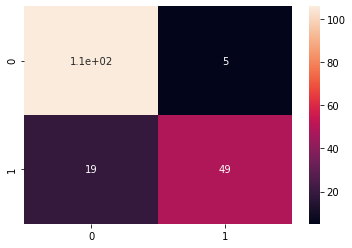

In [53]:
cm_xgb = confusion_matrix(y_test,y_test_xg)
sns.heatmap(cm_xgb,annot=True)

## Test Result

### Predict test file by KNN

In [54]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
test.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [56]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [57]:
test['Sex'] = labelsex.fit_transform(test['Sex'])
test['Embarked'] = labelembarked.fit_transform(test['Embarked'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [58]:
null = ['Age','Fare']
test[null] = test[null].replace({np.nan:test['Age'].mean(),np.nan:test['Fare'].mean()})
test.fillna(test.mean(), inplace=True)

In [59]:
test_pred_knn = knn.predict(test)

### Predict test file by XGBoost

In [60]:
test_pred_xgb = grid_search_xgb.predict(test)